**Dimensionality reduction using PCA, SVD, MDS, ISOMap, LLE, UMAP and t-sne - Wine Quality dataset**

**Initial Data Exploration and Analysis**

**Loading and Understanding the Data**

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Load the dataset
file_path = 'WineQT.csv'
wine_data = pd.read_csv(file_path)

# Display basic information about the dataset
initial_info = wine_data.info()

# Display the first few rows of the dataset
first_rows = wine_data.head()

initial_info, first_rows


Saving WineQT.csv to WineQT.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  Id  
 0      9.4        5   0  
 1      9.8

**Summary Statistics**

In [2]:
# Calculate summary statistics for each feature
summary_statistics = wine_data.describe()

# Check for missing values in each column
missing_values = wine_data.isnull().sum()

summary_statistics, missing_values

(       fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1143.000000       1143.000000  1143.000000     1143.000000   
 mean        8.311111          0.531339     0.268364        2.532152   
 std         1.747595          0.179633     0.196686        1.355917   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.392500     0.090000        1.900000   
 50%         7.900000          0.520000     0.250000        2.200000   
 75%         9.100000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  1143.000000          1143.000000           1143.000000  1143.000000   
 mean      0.086933            15.615486             45.914698     0.996730   
 std       0.047267            10.250486             32.782130     0.001925   
 min       0.012000             1.

**Visualization**

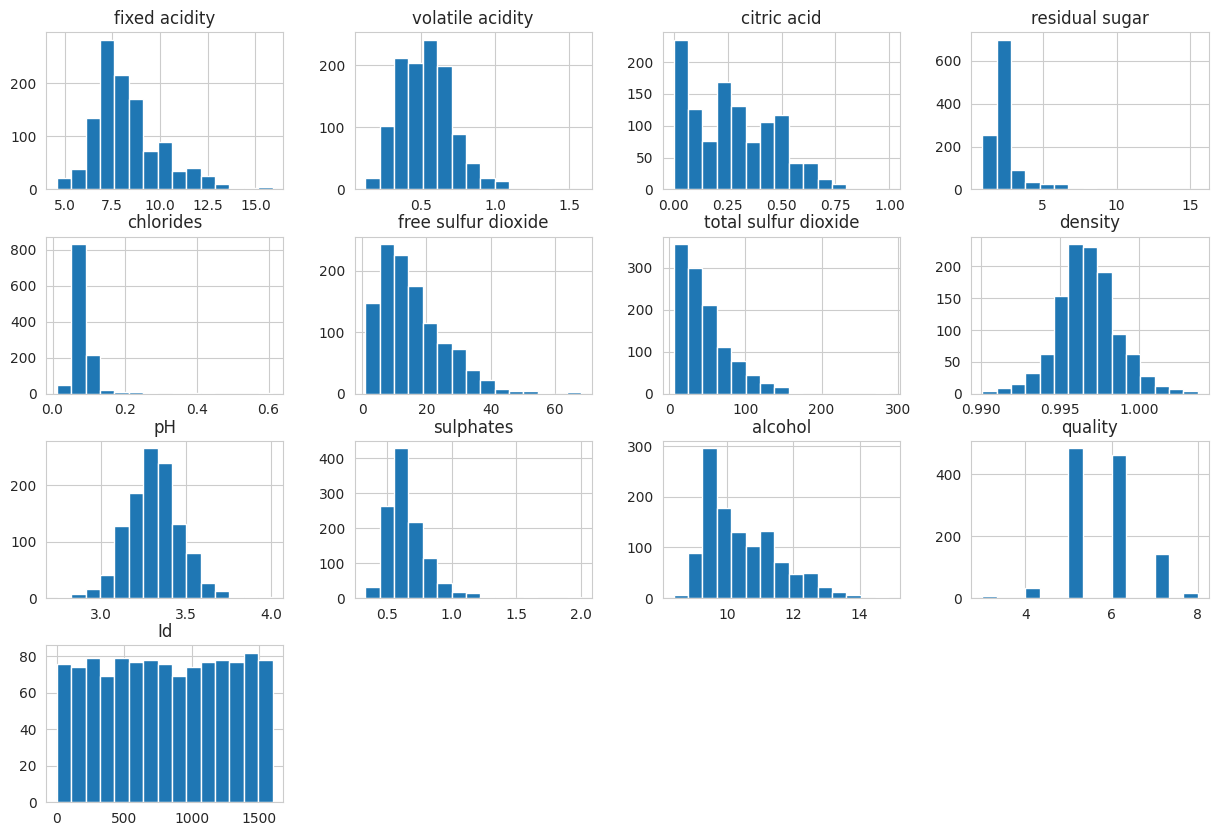

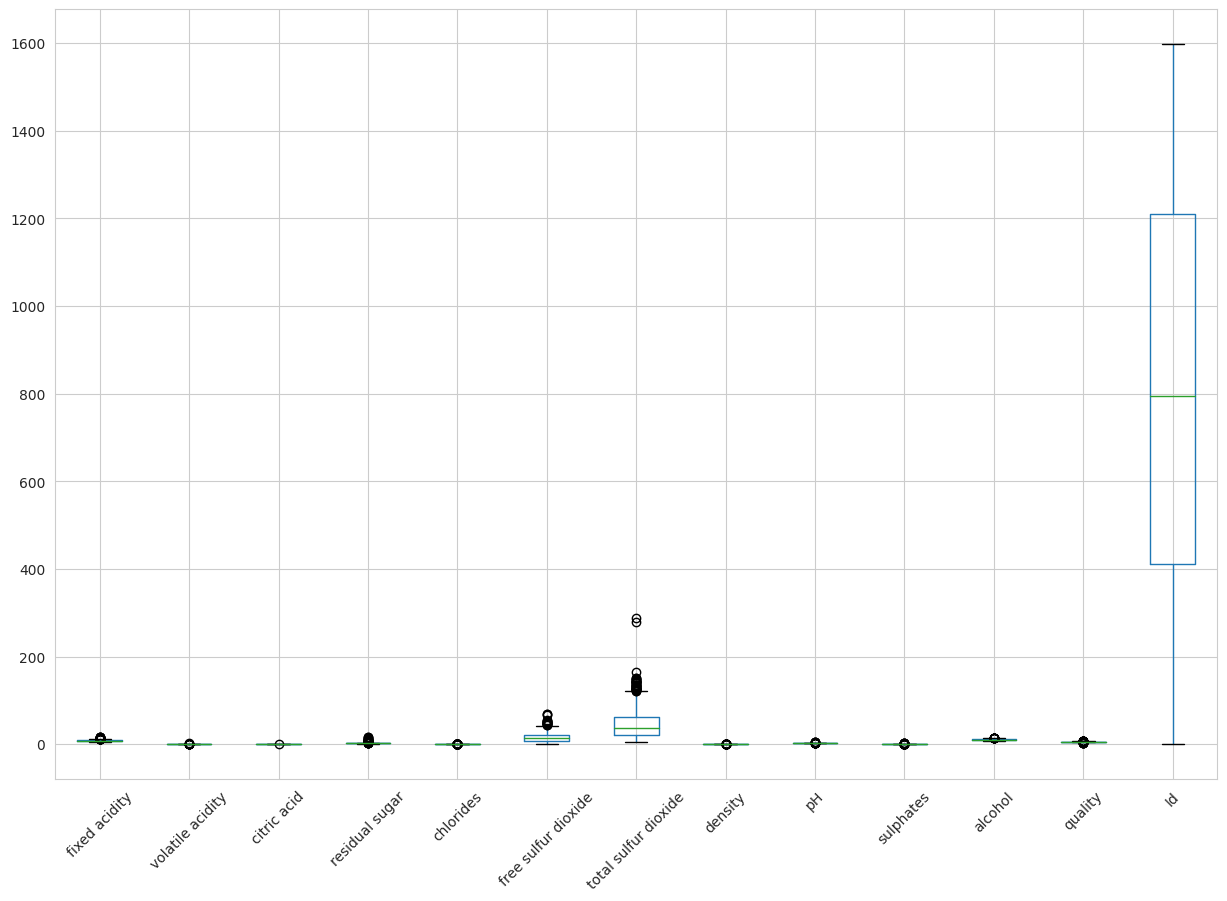

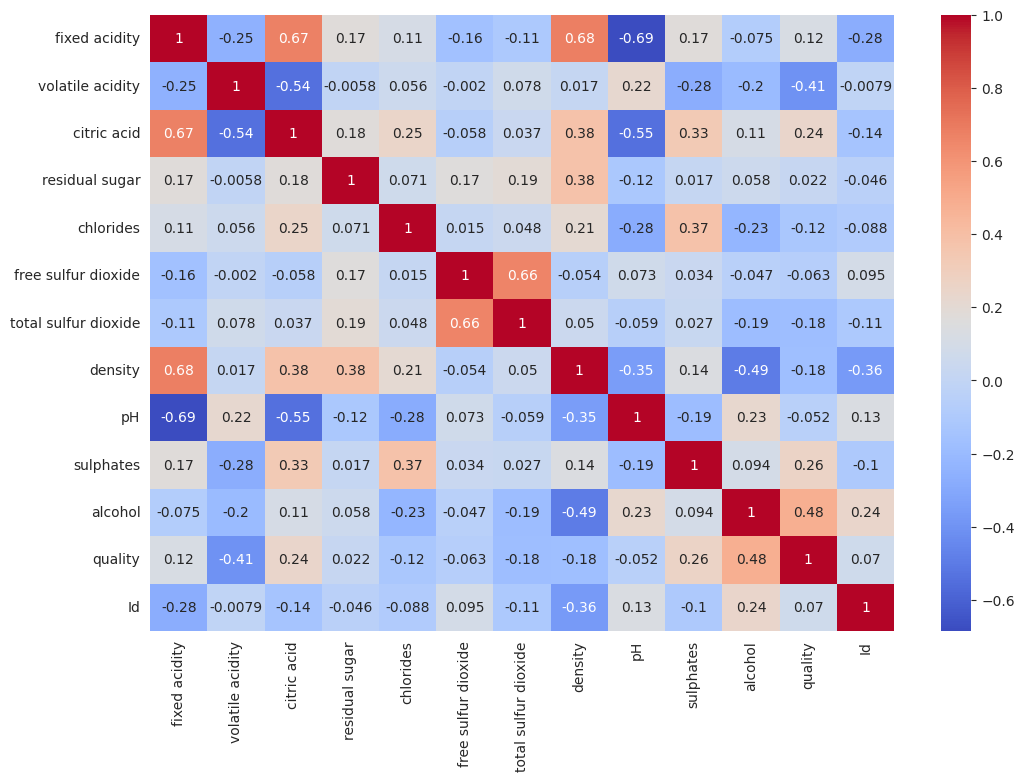

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting histograms for each feature to understand their distributions
wine_data.hist(bins=15, figsize=(15, 10), layout=(4, 4))

# Show the histogram plot
plt.show()

# Plotting box plots to identify potential outliers
plt.figure(figsize=(15, 10))
wine_data.boxplot()
plt.xticks(rotation=45)
plt.show()

# Calculating the correlation matrix
correlation_matrix = wine_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Preprocessing**

In [4]:
from sklearn.preprocessing import StandardScaler

# Dropping the 'Id' column as it's just an identifier and not useful for analysis
wine_data_processed = wine_data.drop('Id', axis=1)

# Separating features and target variable
features = wine_data_processed.drop('quality', axis=1)
target = wine_data_processed['quality']

# Standardizing the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

features_standardized.shape, features_standardized.mean(axis=0), features_standardized.std(axis=0)

((1143, 11),
 array([-3.72988313e-16,  4.47585975e-16,  2.48658875e-17,  1.55411797e-16,
         8.08141344e-17, -5.59482469e-17,  9.94635501e-17,  5.78380544e-14,
        -8.45440176e-16,  4.97317750e-17, -1.19356260e-15]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

**Principal Component Analysis (PCA)**

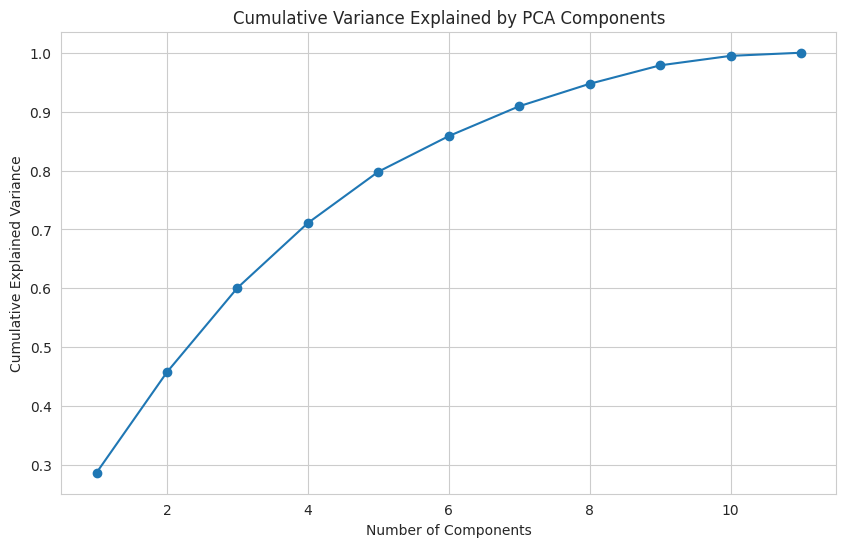

(array([0.28692345, 0.17075104, 0.14305928, 0.1101368 , 0.08711032,
        0.06048811, 0.05069067, 0.03809625, 0.03131763, 0.01611195,
        0.0053145 ]),
 1.0000000000000002)

In [5]:
from sklearn.decomposition import PCA
import numpy as np

# Applying Principal Component Analysis (PCA)
pca = PCA()
features_pca = pca.fit_transform(features_standardized)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)

# Plotting the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance, cumulative_variance[-1]

**Where PCA Works Well**

**Linear Dimensionality Reduction**: PCA is highly effective for reducing the dimensionality of data with linear relationships. It's commonly used in exploratory data analysis to simplify complex datasets while retaining most of the variance.

**Visualization of High-Dimensional Data**: PCA can reduce high-dimensional data to two or three principal components, making it easier to visualize and interpret patterns and relationships in the data.

**Feature Extraction and Noise Reduction**: PCA can extract the most significant features from a dataset and is also useful in noise reduction, by discarding components that contribute less to the dataset's variance.

**Preprocessing for Other Algorithms**: PCA is often used as a preprocessing step to speed up machine learning algorithms on high-dimensional datasets.

**Situations Where PCA Might Not Work Well**

**Non-linear Relationships**: PCA is a linear technique and may not perform well on datasets where the relationships between variables are non-linear. It cannot capture the complexity of such relationships as effectively as non-linear techniques like t-SNE or UMAP.

**Data Interpretation**: The principal components derived from PCA are linear combinations of the original variables and may not have a direct, interpretable meaning. This can make it challenging to draw specific conclusions about the original features.

**Sensitive to Scaling**: PCA is sensitive to the scale of the features. Variables with larger variance can dominate the principal components, so standardizing the data is often necessary.

**Handling Sparse Data**: For very large and sparse datasets, PCA might not be the most efficient method, as it requires dense matrix operations.

**Singular Value Decomposition (SVD)**

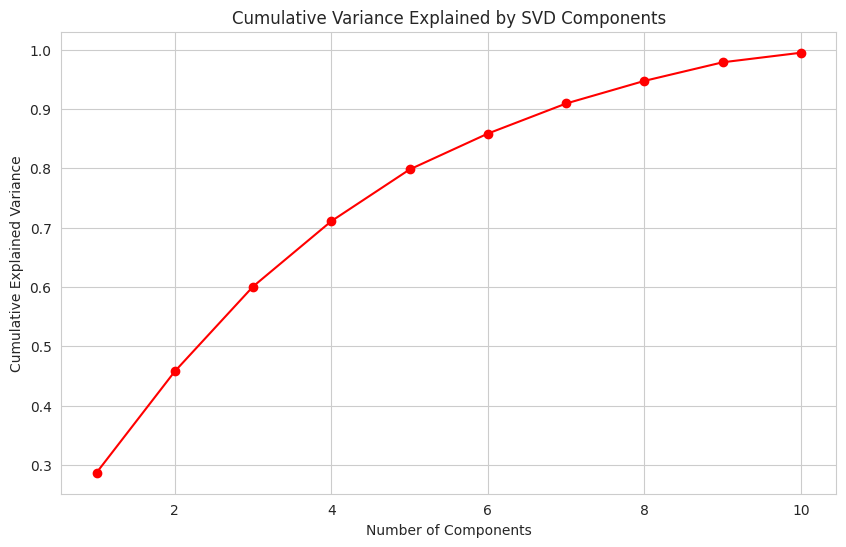

(array([0.28692345, 0.17075104, 0.14305928, 0.1101368 , 0.08711032,
        0.06048811, 0.05069067, 0.03809625, 0.03131763, 0.01611195]),
 0.9946855016330417)

In [6]:
from sklearn.decomposition import TruncatedSVD

# Applying Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=features_standardized.shape[1] - 1)
features_svd = svd.fit_transform(features_standardized)

# Variance explained by each component in SVD
explained_variance_svd = svd.explained_variance_ratio_

# Cumulative variance explained by SVD components
cumulative_variance_svd = np.cumsum(explained_variance_svd)

# Plotting the cumulative variance for SVD
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_svd) + 1), cumulative_variance_svd, marker='o', color='red')
plt.title('Cumulative Variance Explained by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance_svd, cumulative_variance_svd[-1]

**Where SVD Works Well**

**Matrix Factorization and Data Compression**: SVD is extremely useful in matrix factorization and is often used for data compression, noise reduction, and feature extraction in various fields, including signal processing and recommendation systems.

**Latent Semantic Analysis**: In text processing, SVD is used for latent semantic analysis (LSA), where it helps in identifying patterns and themes in text data by reducing the dimensionality of term-document matrices.

**Principal Component Analysis (PCA)**: SVD underlies the popular PCA technique and is effective for linear dimensionality reduction, especially in cases where the covariance matrix is large.

**Image Processing**: In image processing, SVD is used for tasks like image compression and denoising, as it can efficiently represent an image with a reduced number of singular values.

**Situations Where SVD Might Not Work Well**

**Handling Non-linear Structures**: SVD, being a linear method, is not suitable for datasets where the intrinsic structure is non-linear. It cannot capture non-linear relationships as effectively as methods like t-SNE or UMAP.

**Large Sparse Datasets**: While SVD is computationally efficient for smaller datasets, it can be challenging to apply to very large and sparse datasets, like some text corpora or extremely high-dimensional data.

**Interpreting Components**: The components derived from SVD might lack a direct, interpretable meaning, which can be a challenge in understanding the transformed data.

**Sensitivity to Scale**: SVD is sensitive to the scale of the data. Variables with larger scales can dominate the outcome, so data normalization or standardization is often necessary before applying SVD.

**Multidimensional Scaling (MDS)**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


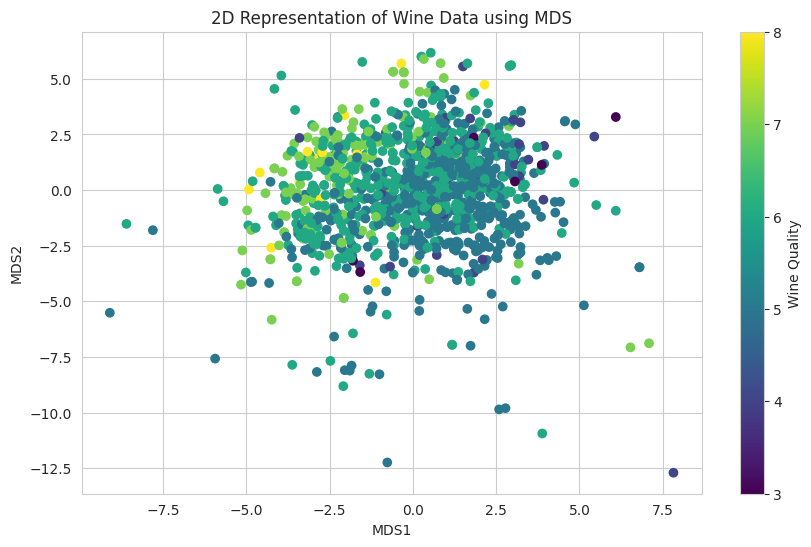

(1143, 2)

In [7]:
from sklearn.manifold import MDS

# Applying Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=0)
features_mds = mds.fit_transform(features_standardized)

# Plotting the results of MDS
plt.figure(figsize=(10, 6))
plt.scatter(features_mds[:, 0], features_mds[:, 1], c=target, cmap='viridis')
plt.colorbar(label='Wine Quality')
plt.title('2D Representation of Wine Data using MDS')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.grid(True)
plt.show()

features_mds.shape

**Where MDS Works Well**

**Visualizing Similarity/Dissimilarity Data**: MDS is particularly effective for datasets where the primary interest is in visualizing the similarity or dissimilarity between data points, such as in psychological scaling, marketing research, or bioinformatics.

**Dimensionality Reduction**: MDS can reduce high-dimensional data to two or three dimensions, which is useful for creating visual representations of complex datasets.

**Handling Both Metric and Non-metric Data**: MDS offers flexibility as it can be used with both metric (quantitative) and non-metric (qualitative) similarity measures, making it versatile for various types of data.

**Situations Where MDS Might Not Work Well**

**Large Datasets**: MDS can be computationally demanding, especially for large datasets, due to the need to compute and work with a full distance matrix.

**Interpreting Reduced Dimensions**: Like many dimensionality reduction techniques, the axes in MDS plots do not have intrinsic meanings, which can make interpretation challenging.

**Sensitivity to Noise and Outliers**: MDS can be sensitive to noise and outliers in the data. These can significantly affect the distance calculations and thus the final configuration.

**Preservation of Global vs. Local Structures**: While MDS aims to preserve distances, it may not always effectively balance local and global structures in the data, unlike some more advanced techniques like t-SNE or UMAP.

**Isomap**

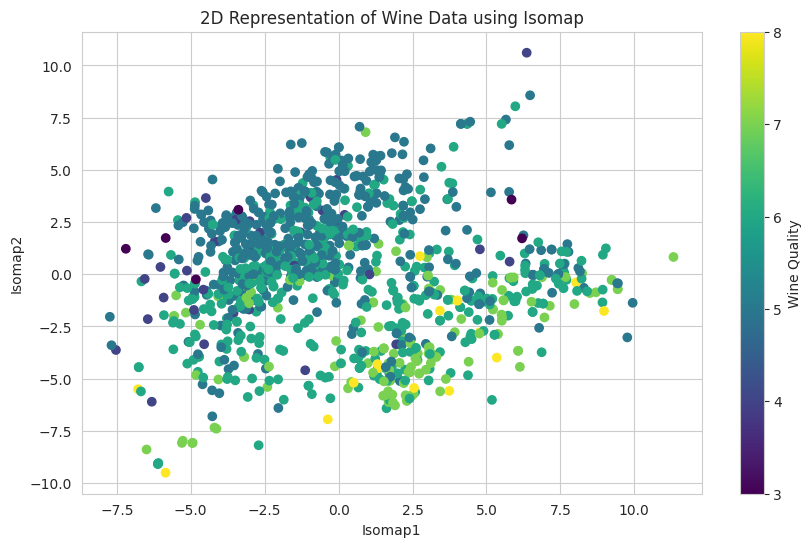

(1143, 2)

In [8]:
from sklearn.manifold import Isomap

# Applying Isomap
isomap = Isomap(n_components=2)
features_isomap = isomap.fit_transform(features_standardized)

# Plotting the results of Isomap
plt.figure(figsize=(10, 6))
plt.scatter(features_isomap[:, 0], features_isomap[:, 1], c=target, cmap='viridis')
plt.colorbar(label='Wine Quality')
plt.title('2D Representation of Wine Data using Isomap')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.grid(True)
plt.show()

features_isomap.shape

**Where Isomap Works Well**

**Uncovering Geodesic Structures**: Isomap is particularly effective for datasets where the underlying structure can be best understood through geodesic distances (the distances measured along the manifold) rather than Euclidean distances. It's great for unfolding non-linear manifolds.

**Dimensionality Reduction for Visualization**: Isomap can reduce high-dimensional data to two or three dimensions, making it useful for visualizing complex datasets and uncovering hidden structures.

**Handling Non-linear Relationships**: It excels in datasets with non-linear relationships, as it attempts to preserve the intrinsic geometry of the data.

**Situations Where Isomap Might Not Work Well**

**Large Datasets**: Isomap can be computationally intensive, especially with large datasets, due to its need to compute pairwise distances and perform eigenvalue decompositions.

**Noise and Outliers**: Isomap can be sensitive to noise and outliers. The presence of outliers can significantly distort the representation of the data in the reduced space.

**Global versus Local Structures**: While Isomap maintains global properties of the dataset, it might not capture local variations as effectively as some other techniques like t-SNE or UMAP.

**Interpretability of Reduction**: The dimensions obtained after reduction with Isomap do not have an intuitive interpretation, which is a common limitation in many manifold learning techniques.

**Locally Linear Embedding (LLE)**

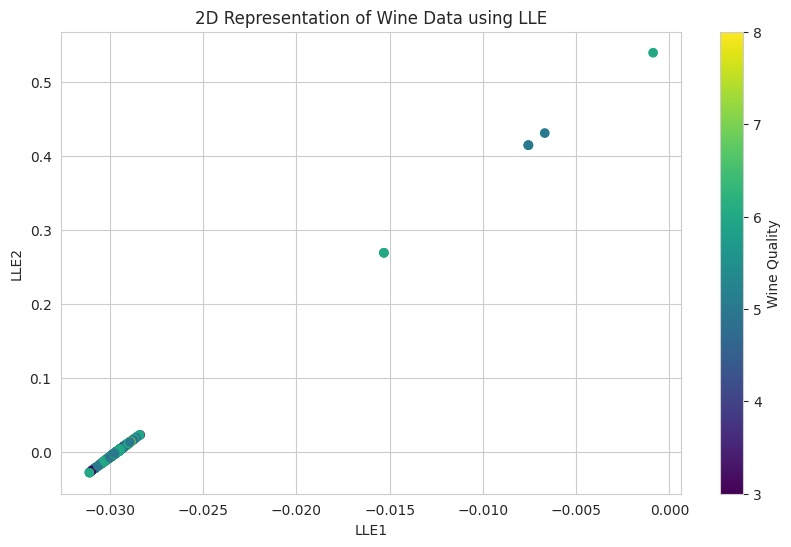

(1143, 2)

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

# Applying Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=0)
features_lle = lle.fit_transform(features_standardized)

# Plotting the results of LLE
plt.figure(figsize=(10, 6))
plt.scatter(features_lle[:, 0], features_lle[:, 1], c=target, cmap='viridis')
plt.colorbar(label='Wine Quality')
plt.title('2D Representation of Wine Data using LLE')
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.grid(True)
plt.show()

features_lle.shape

**Where LLE Works Well**

**Uncovering Non-linear Structures**: LLE is effective for datasets where the underlying structure is non-linear. It's particularly good at unfolding twisted or curved manifolds.

**Preserving Local Neighborhoods**: LLE excels in maintaining the local neighborhood structures of the data, making it suitable for datasets where local relationships are more significant than global relationships.

**Dimensionality Reduction for Visualization**: LLE can be used to reduce the dimensionality of data to two or three dimensions for visualization purposes, helping to reveal hidden patterns or groupings.

**Situations Where LLE Might Not Work Well**

**Global Structure Preservation**: LLE may not perform well in preserving the global structure of the data, as its primary focus is on local neighborhoods.

**Large Datasets**: LLE can be computationally intensive, especially for large datasets, due to its reliance on nearest-neighbor searches and eigenvalue decompositions.

**Noise Sensitivity**: LLE might be sensitive to noise in the data. In the presence of significant noise, LLE may produce distorted embeddings.

**Interpretability of Results**: Like other manifold learning techniques, the reduced dimensions produced by LLE do not have a straightforward interpretation.

**Uniform Manifold Approximation and Projection (UMAP) Analysis**

In [13]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=417ab8dee1f36d70f99315a7247f653c6fb492e87c073982ccbe5427a838e936
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


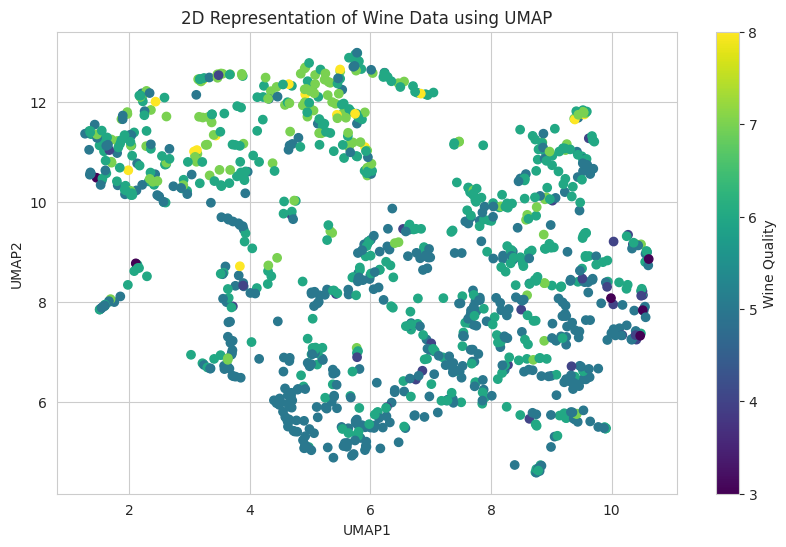

(1143, 2)

In [14]:
from umap import UMAP

# Applying UMAP
umap_model = UMAP(n_components=2, random_state=0)
features_umap = umap_model.fit_transform(features_standardized)

# Plotting the results of UMAP
plt.figure(figsize=(10, 6))
plt.scatter(features_umap[:, 0], features_umap[:, 1], c=target, cmap='viridis')
plt.colorbar(label='Wine Quality')
plt.title('2D Representation of Wine Data using UMAP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid(True)
plt.show()

features_umap.shape

**Where UMAP Works Well**

**High-Dimensional Data Visualization**: UMAP is highly effective in reducing complex, high-dimensional data (like genomic data, image data, or extensive feature sets) to two or three dimensions for visualization purposes.

**Preserving Local and Global Structure**: Unlike many other dimensionality reduction techniques, UMAP can preserve both local and global structures in the data, making it more versatile.

**Exploratory Data Analysis**: UMAP helps in uncovering underlying structures and patterns in the data, which can be crucial for hypothesis generation and further detailed analysis.

**Handling Non-linear Data**: UMAP is particularly adept at dealing with non-linear relationships in the data, making it suitable for complex datasets where linear assumptions do not hold.

**Situations Where UMAP Might Not Work Well**

**Large Scale Interpretability**: While UMAP is excellent for visualization, the interpretability of the reduced dimensions can be challenging, similar to t-SNE. The axes in UMAP plots don't have a direct interpretation.

**Consistency Across Runs**: UMAP results can vary with different runs due to its stochastic nature. Fixing the random state can help but might not completely eliminate this variability.

**Computational Intensity for Large Datasets**: For very large datasets, UMAP might be computationally demanding, although it's generally more efficient than t-SNE in this regard.

**Overemphasis on Local Structure**: In some cases, UMAP might overemphasize the preservation of local structures at the expense of global relationships.

**t-Distributed Stochastic Neighbor Embedding (t-SNE) Analysis**

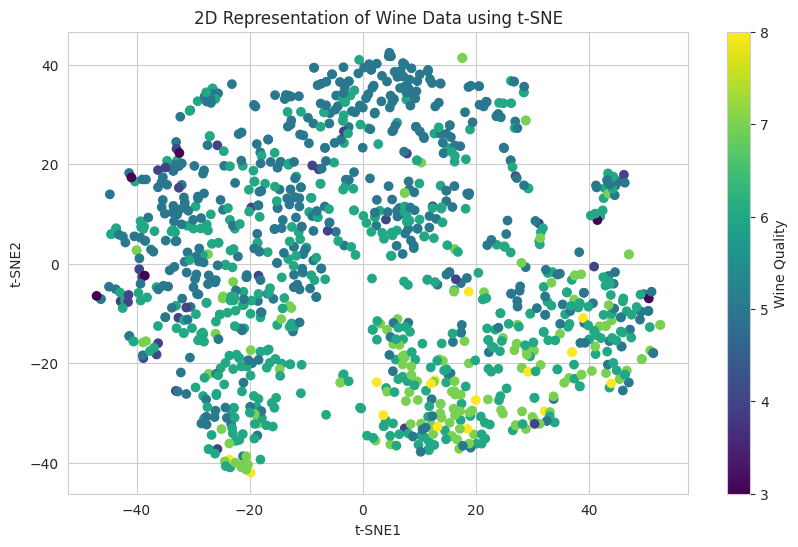

(1143, 2)

In [15]:
from sklearn.manifold import TSNE

# Applying t-Distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=2, random_state=0)
features_tsne = tsne.fit_transform(features_standardized)

# Plotting the results of t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=target, cmap='viridis')
plt.colorbar(label='Wine Quality')
plt.title('2D Representation of Wine Data using t-SNE')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.grid(True)
plt.show()

features_tsne.shape

**Where t-SNE Works Well**

**Visualizing High-Dimensional Data**: t-SNE is excellent for reducing high-dimensional data (like image data, complex sensor data, or multi-dimensional feature sets) to two or three dimensions for visualization.

**Revealing Clusters**: It's particularly effective at separating distinct clusters or groups in the data, even when these clusters are not apparent in the original high-dimensional space.

**Exploratory Data Analysis**: t-SNE helps in exploring the underlying structure of the data, revealing patterns that might inform further analysis or model building.


**Situations Where t-SNE Might Not Work Well**

**Large Datasets**: t-SNE can be computationally intensive, especially for very large datasets. It might become impractical or require significant computational resources for datasets with a high number of samples.

**Interpretation of Axes**: The axes in t-SNE plots do not have a specific, interpretable meaning (unlike axes in PCA, for example). This can make it challenging to draw direct conclusions about the feature relationships.

**Consistency Across Runs**: The results of t-SNE can vary significantly between runs due to its stochastic nature, unless you fix the random state. This can sometimes lead to misinterpretation if the variability is not taken into account.

**Distance Preservation**: t-SNE does not necessarily preserve distances between clusters. Two points that are close in the t-SNE plot might not necessarily be close in the high-dimensional space.

**Apply UMAP with default hyperparameters to get a baseline**

Text(0.5, 1.0, 'UMAP with Default Parameters')

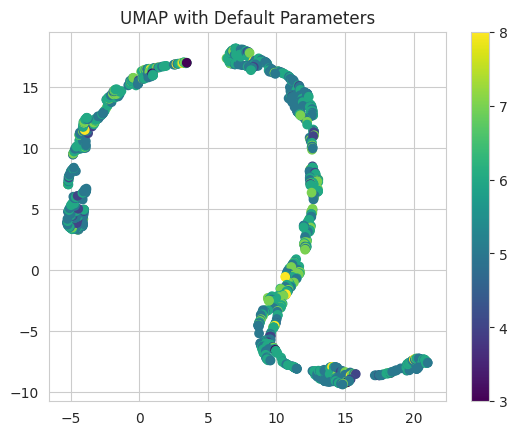

In [17]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(wine_data)
plt.scatter(embedding[:, 0], embedding[:, 1], c=target, cmap='viridis')
plt.colorbar()
plt.title('UMAP with Default Parameters')

**Example 1: UMAP with n_neighbors=5 and min_dist=0.1**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


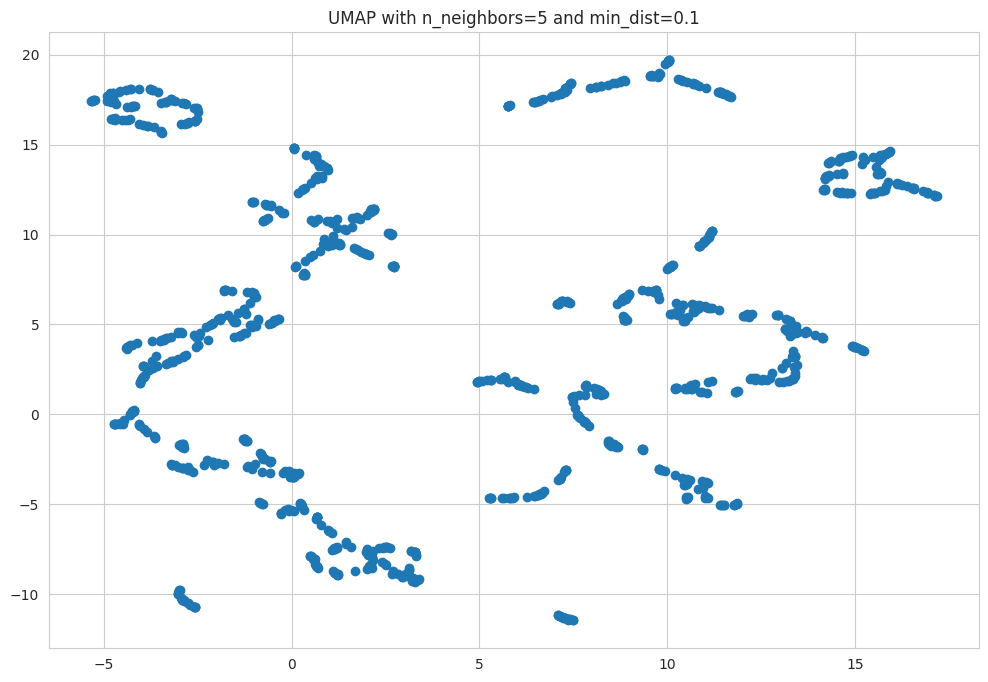

In [21]:
reducer = umap.UMAP(n_neighbors=5, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(wine_data)
plt.figure(figsize=(12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP with n_neighbors=5 and min_dist=0.1')
plt.show()


**Example 2: UMAP with n_neighbors=15 and min_dist=0.3**

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


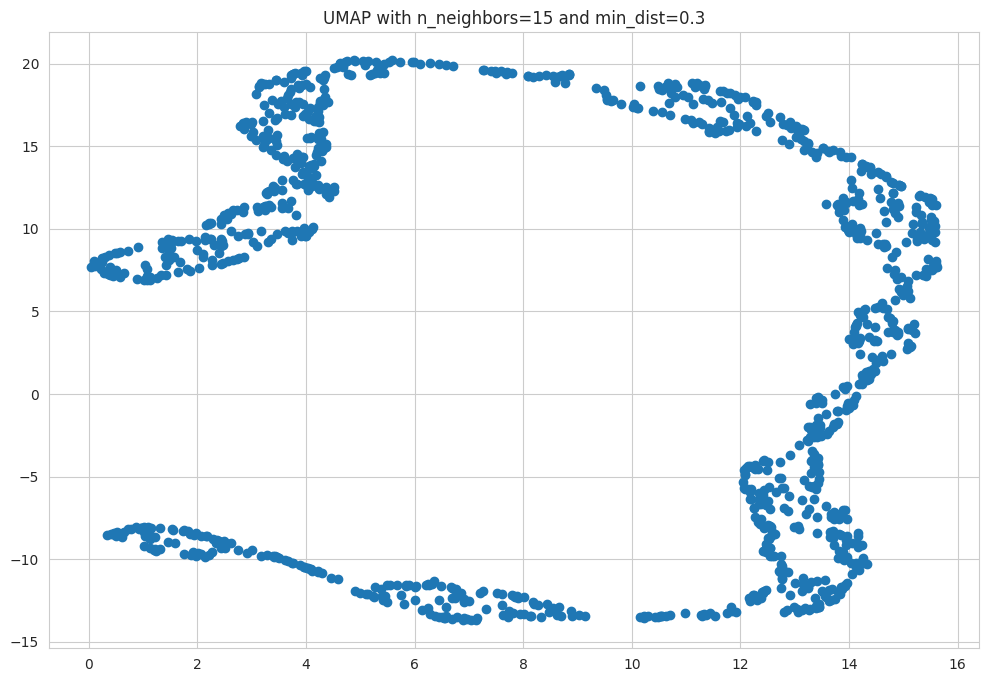

In [23]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.3, random_state=42)
embedding = reducer.fit_transform(wine_data)
plt.figure(figsize=(12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP with n_neighbors=15 and min_dist=0.3')
plt.show()